Filename is pcc_resnet50_X.h5 (where X is model number)


In [1]:
from keras.models import load_model
# from keras.preprocessing import image
# import keras.utils as image
# from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
import seaborn as sns
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from PIL import Image
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    From scikit-learn: plots a confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #fixes "squishing of plot"
    plt.ylim([1.5, -.5]) 
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()


https://stackoverflow.com/questions/43469281/how-to-predict-input-image-using-trained-model-in-keras

In [3]:
# testDir = 'clean-flags-big-sweep'
# testImgs = glob.glob(os.path.join(testDir, '*.png'))
# img_width, img_height = 200, 200

# predictions = []

# for ind, im in enumerate(testImgs):
# #     print(ind, im)
# #     imPaths.append(im)
#     img = image.load_img(im, target_size=(img_width, img_height))
#     x = image.img_to_array(img)
#     ex = np.expand_dims(x, axis = 0)
#     images = np.vstack([ex])
    
#     pred = cnn_model.predict(ex)
#     pred = np.argmax(pred, axis = 1)
#     predictions.append(pred[0])
    
# #     if ind > 4:
# #         break

In [4]:
# mkdir bigSweepPredictions

In [5]:
# predictDir = 'bigSweepPredictions'

# for ind, im in enumerate(testImgs):
    
#     img = image.load_img(im, target_size=(img_width, img_height))
    
#     plt.figure()
#     plt.imshow(img)
#     plt.title(f'Predicted as {predictions[ind]}')
    
#     basename = os.path.basename(im)
#     filename = os.path.join(predictDir, f'{str(basename[:-4])}_label={str(predictions[ind])}')
# #     print(filename)
#     plt.savefig(f'{filename}.png')
#     plt.close()

In [6]:
# join on specObj to see if missmatch b/t PhotoObj type and SpecObj type
# also want to see if objects in PCC appear

radialSearchSpec = f'SELECT TOP 300 p.objID, p.ra, p.dec, \
 p.modelMag_r, \
 p.modelMag_u - p.modelMag_g as u_g, \
 p.modelMag_g - p.modelMag_z as g_z, \
 p.modelMag_g - p.modelMag_r as g_r, \
 p.modelMag_g - p.modelMag_i as g_i, \
 p.modelMag_r - p.modelMag_i as r_i, \
 p.modelMag_r - p.modelMag_z as r_z, \
 p.petroRad_r, p.flags, dbo.fPhotoFlagsN(p.flags) as flag_text, \
 s.specObjID, s.z, s.zErr, s.zWarning, s.class, s.subClass, \
 N.distance \
FROM\
 photoObj as p \
JOIN SpecObjAll s ON p.objID = s.bestObjID \
JOIN dbo.fGetNearbyObjEq(49.9467, 41.5131, 45) as N ON N.objID = p.objID \
WHERE \
 p.modelMag_r > -14.3*(p.modelMag_g - p.modelMag_z) + 37 \
 and p.modelMag_r < -14.3*(p.modelMag_g - p.modelMag_z) + 46 \
 and p.type = 3 \
ORDER BY distance'

radDf = CasJobs.executeQuery(radialSearchSpec, "dr16")
# radDf

(array([16.,  0.,  0., 17., 52., 45., 24., 10.,  6.,  0.,  0.,  1.,  0.,
         0.,  3.,  1.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         3.]),
 array([-0.00039393,  0.00301646,  0.00642685,  0.00983724,  0.01324763,
         0.01665802,  0.02006841,  0.0234788 ,  0.02688919,  0.03029959,
         0.03370998,  0.03712037,  0.04053076,  0.04394115,  0.04735154,
         0.05076193,  0.05417232,  0.05758271,  0.0609931 ,  0.06440349,
         0.06781388,  0.07122427,  0.07463467,  0.07804506,  0.08145545,
         0.08486584,  0.08827623,  0.09168662,  0.09509701,  0.0985074 ,
         0.10191779,  0.10532818,  0.10873857,  0.11214896,  0.11555936,
         0.11896975,  0.12238014,  0.12579053,  0.12920092,  0.13261131,
         0.1360217 ]),
 <BarContainer object of 40 artists>)

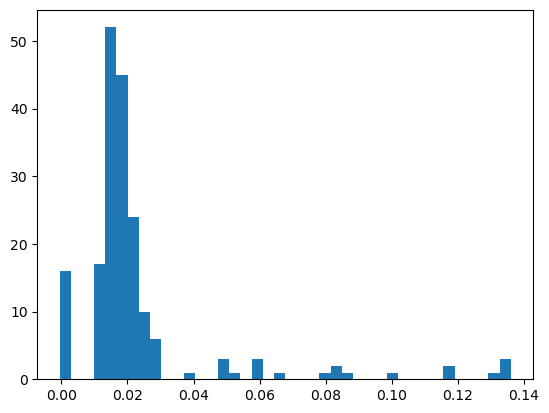

In [7]:
plt.hist(radDf['z'], bins = 40)

Cluster member redshift range 0.01 < spec-z < 0.033 \
Stars spec-z < 0.01 \
Background spec-z > 0.033

In [8]:
def labeler(num):
    if (num > 0.01 and num < 0.033):
        return(1) # members
        
    else:
        return(0) # background
        

# def labeler(num):
#     if num > 0.033:
#         return(0) # background
        
#     elif num > 0.01 and num < 0.033:
#         return(1) # members
        
#     else:
#         return(2) # stars

In [7]:
SkyServer_DataRelease = 'DR16'
img_width, img_height = 200, 200

# # img_array = SkyServer.getJpegImgCutout(ra=197.614455642896, dec=18.438168853724, width=200, height=200, scale=0.1, 
# #                                  dataRelease=SkyServer_DataRelease)
# img_array = SkyServer.getJpegImgCutout(ra=49.9955, dec=41.2136, width=200, height=200, scale=0.1, 
#                                  dataRelease=SkyServer_DataRelease)

# # outPicTemplate = f'{}'
# img0 = Image.fromarray(img_array, 'RGB')
# # img0.save(f'{outDir}/.png')
# img0


In [8]:
# rm -rf /Radial-Search-2_2024
# radDf.sort_values(by=['modelMag_r'])
# threshold for the r-band -- the lower the brighter
rmag_threshold = 17.3
faint = np.where(radDf['modelMag_r'] >= rmag_threshold)
faintDf = radDf.iloc[faint].copy()
faintDf.sort_values(by = ['modelMag_r'])


NameError: name 'radDf' is not defined

In [9]:
plt.hist(radDf['modelMag_r'])


NameError: name 'radDf' is not defined

In [12]:
### Populating Test set ###
outDir = '..\Images\Radial-Search-2_2024'
numImgs = radDf.shape[0]
print(f'Search has {numImgs} images')

# if len(outDir) == len(radDf['objID']):
if len(glob.glob(os.path.join(outDir, '*.png'))) == numImgs:
    print('Skipping populate')
else:
    for id, z, r, d in zip(radDf['objID'], radDf['z'], radDf['ra'], radDf['dec']):
        img_array = SkyServer.getJpegImgCutout(ra=r, dec=d, width=img_width, height=img_height, scale=0.1, 
                                     dataRelease=SkyServer_DataRelease)
        # print(f'{id}-label={labeler(z)}')
        outPicTemplate = f'{id}-label={labeler(z)}.png'
        
        img0 = Image.fromarray(img_array, 'RGB')
        img0.save(f'{outDir}/{outPicTemplate}')

Search has 190 images


In [2]:
## Make outdir into a dataframe
outDir = '..\Images\Radial-Search-2_2024'

testFiles = glob.glob(os.path.join(outDir, '*'))
testDf = pd.DataFrame({'files' : testFiles,
                       'labels': [int(filename[-5:-4]) for filename in testFiles]})

testDf

,files,labels
0,..\Images\Radial-Search-2_2024\123766105528146...,0
1,..\Images\Radial-Search-2_2024\123766105528152...,1
2,..\Images\Radial-Search-2_2024\123766105528152...,1
3,..\Images\Radial-Search-2_2024\123766105528152...,0
4,..\Images\Radial-Search-2_2024\123766105528152...,1
...,...,...
155,..\Images\Radial-Search-2_2024\123767095948424...,1
156,..\Images\Radial-Search-2_2024\123767096002111...,1
157,..\Images\Radial-Search-2_2024\123767096002150...,0
158,..\Images\Radial-Search-2_2024\123767096002150...,1


In [3]:
testDf.to_csv('testDf') # checking visually for label mismatch

In [4]:
models = glob.glob(os.path.join('..', 'Models', '*.h5'))
print(models[-1])

..\Models\pcc_resnet50_9.h5


In [5]:
# # models = ['..\Models\pcc_resnet50_1.h5','..\Models\pcc_resnet50_2.h5','..\Models\pcc_resnet50_3.h5','..\Models\pcc_resnet50_4.h5','..\Models\pcc_resnet50_5.h5']

# # modelStr = 'pcc_resnet50_3.h5'
# # for modelStr in models:
# for modelStr in models[0]:
#     print(modelStr)
#     cnn_model = load_model(modelStr)
#     cnn_model.load_weights
#     # cnn_model.summary()
#     # print(testFiles)
#     predictions = []
    
#     for ind, im in enumerate(testDf['files']):
#         img = load_img(im, target_size=(img_width, img_height))
#         x = img_to_array(img)
#         ex = np.expand_dims(x, axis = 0)
#         images = np.vstack([ex])
        
#         pred = cnn_model.predict(ex)
#         # print(pred)
#         pred = np.argmax(pred, axis = 1)
#         predictions.append(pred[0])
#         # print(im, pred[0])
#         # print(f'image is {im[-5:-4]}, model predicts {pred[0]}')
        
#         # if ind > 4:
#         #     break
    
#     # cf_mtx = confusion_matrix(Y_true, y_pred)
#     Y_true = testDf['labels'].to_list()[:len(predictions)]
#     cf_mtx = confusion_matrix(Y_true, predictions)
    
#     group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
#     group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
#     box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
#     box_labels = np.asarray(box_labels).reshape(2, 2)
    
#     plt.figure(figsize = (12, 10))
#     # # sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
#     # #            cmap="YlGnBu", fmt="", annot=box_labels)
#     sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="", annot=box_labels)
#     # sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="")
    
#     plt.title(f'performance of {modelStr}')
#     plt.xlabel('Predicted Classes')
#     plt.ylabel('True Classes')
#     plt.savefig(f'{modelStr[:-3]}-performance.png')
#     plt.show()

In [14]:
testDf

,files,labels
0,..\Images\Radial-Search-2_2024\123766105528146...,0
1,..\Images\Radial-Search-2_2024\123766105528152...,1
2,..\Images\Radial-Search-2_2024\123766105528152...,1
3,..\Images\Radial-Search-2_2024\123766105528152...,0
4,..\Images\Radial-Search-2_2024\123766105528152...,1
...,...,...
155,..\Images\Radial-Search-2_2024\123767095948424...,1
156,..\Images\Radial-Search-2_2024\123767096002111...,1
157,..\Images\Radial-Search-2_2024\123767096002150...,0
158,..\Images\Radial-Search-2_2024\123767096002150...,1


..\Models\pcc_resnet50_9.h5


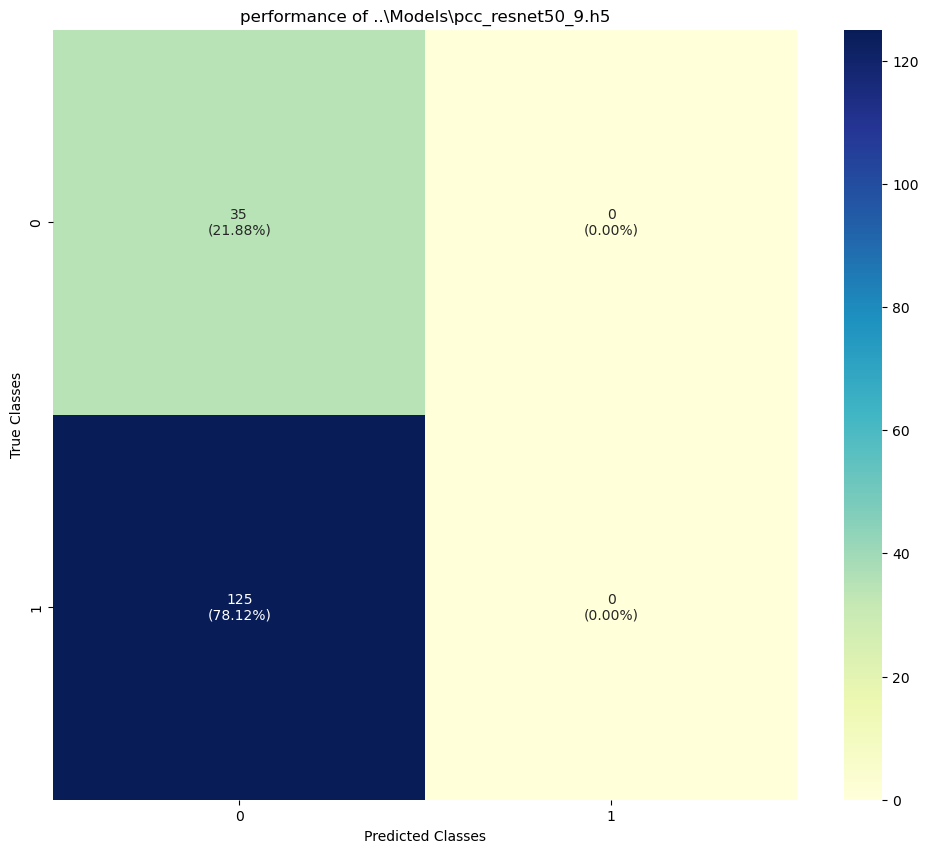

              precision    recall  f1-score   support

           0       0.22      1.00      0.36        35
           1       0.00      0.00      0.00       125

    accuracy                           0.22       160
   macro avg       0.11      0.50      0.18       160
weighted avg       0.05      0.22      0.08       160



In [16]:
modelStr = models[-1]
print(modelStr)
cnn_model = load_model(modelStr)
cnn_model.load_weights
# cnn_model.summary()
# # print(testFiles)
y_pred = []

for ind, im in enumerate(testDf['files']):
    img = load_img(im, target_size=(img_width, img_height))
    x = img_to_array(img)
    ex = np.expand_dims(x, axis = 0)
    images = np.vstack([ex])
    
    pred = cnn_model.predict(ex)
    # print(pred)
    pred = np.argmax(pred, axis = 1)
    y_pred.append(pred[0])
    # print(im, pred[0])
    # print(f'image is {im[-5:-4]}, model predicts {pred[0]}')
    
    # if ind > 4:
    #     break

# cf_mtx = confusion_matrix(Y_true, y_pred)
Y_true = testDf['labels'].to_list()[:len(y_pred)]
cf_mtx = confusion_matrix(Y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(2, 2)

plt.figure(figsize = (12, 10))
# # sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
# #            cmap="YlGnBu", fmt="", annot=box_labels)
sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="", annot=box_labels)
# sns.heatmap(cf_mtx, cmap="YlGnBu", fmt="")

plt.title(f'performance of {modelStr}')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.savefig(f'{modelStr[:-3]}-performance.png')
plt.show()

print(classification_report(Y_true, y_pred, labels = [0, 1]))

In [13]:
def checkBalance(df):
    all_labels = df['labels']
    all_labels = all_labels.tolist()
    balance = df['labels'].value_counts()
    print(balance)
    for i in range(len(balance)):
        print(f'{2*balance[i]*100/df.size:.2f} %')

checkBalance(testDf)

1    125
0     35
Name: labels, dtype: int64
21.88 %
78.12 %
